# Pokemon Data Analysis
## Minghao Dai   
- Description:
  - In this project, I'm trying to use different libraries to analyze a Pokemon descriptive dataset from Internet. First I did visualization and exploratory data analysis, and then try to do principal component analysis and reduce the dimension of the dataset. 
  
- Outline of structure of the code:
  - Notebook prep
  - Data import
  - Exploratory data analysis
  - Principal component analysis

----------
# Notebook Prep

First import the packages I'll use in this project

In [26]:
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [4]:
%matplotlib inline

# Data Import

Read in the dataset with Pandas

In [6]:
pkmn = pd.read_csv('C:\\Users\\Minghao\\Documents\\16 fall\\3101 Python\\proj\\Pokemon.csv')
pkmn.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Exploratory Data Analysis

+ First I made two scatterplot of "Attack" and "Defense", "Sp. Atk" and "Sp. Def" respectively. 

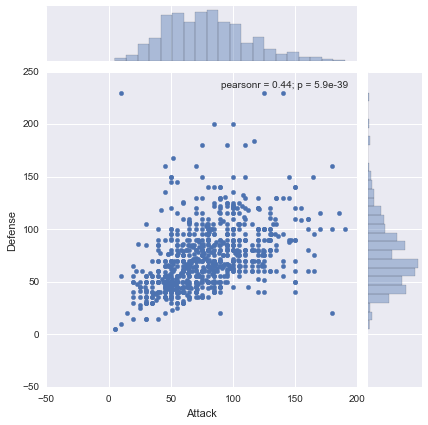

In [42]:
sns.jointplot(x="Attack", y="Defense", data=pkmn);

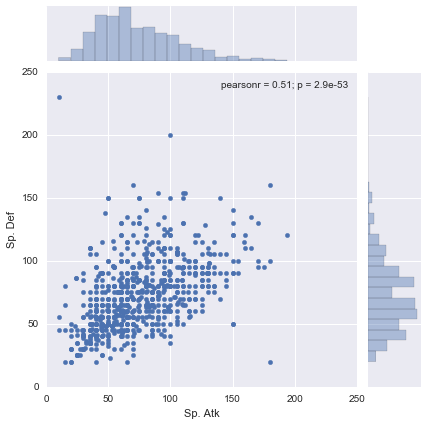

In [7]:
sns.jointplot(x="Sp. Atk", y="Sp. Def", data=pkmn);

From the two scatterplots above, we can see that, there are positive relationship between both of the two sets of variables. This makes sense, since the high level pokemons usually have higher attack as well as defense ability. 

+ Then we would like to use the boxplot to see the rough distribution of each ability for all pokemons.

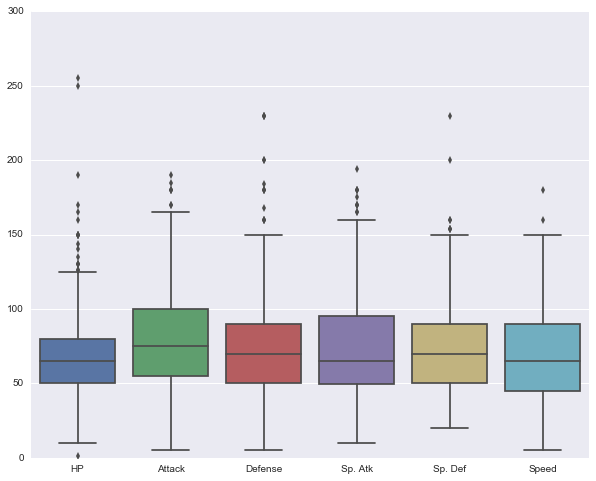

In [8]:
ability = pkmn.drop(['Total', '#', "Generation", "Legendary"],1)
plt.figure(figsize=(10,8))
sns.boxplot(data=ability);

From the boxplots of six abilities, there are some outliers in the upper part, which means there are some pokemons with much higher abilities than the most of other pokemons. Moreover, the mean of the six abilities are almost the same, we can conclude that they may be from a same distribution. 

+ It will be better if we can include pokemon type in this visualization. We can achive this by switching the graph to a swarmplot and color code the points by type.

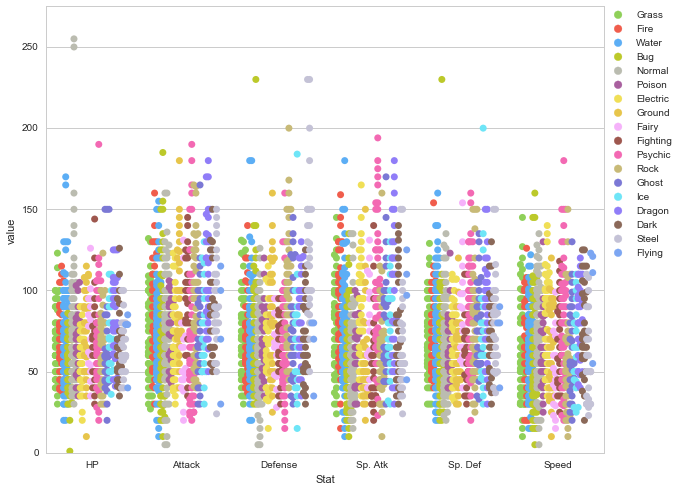

In [48]:
typeabl = pd.melt(ability, id_vars=["Name", "Type 1", "Type 2"], var_name="Stat")
sns.set_style("whitegrid")
with sns.color_palette([
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9):
    plt.figure(figsize=(10,8))
    plt.ylim(0, 275)
    sns.swarmplot(x="Stat", y="value", data=typeabl, hue="Type 1", split=True, size=7)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

From this visualization, we can see that, there are some Steel type pokemons with very high HP and Defense value, which is matched with their type name. Some Bug type pokemons have very high defense and special defense, I think this is a really strong pokemon probabily with Steel as Type 2. Psychic type usually have higher Attack and special Attack, but relatively lower Defense and special Defense. 

# Principal Component Analysis

In this part, I'll do a principal component analysis and try to use less variables to describe the overall ability of pokemons in this dataset.  

In [9]:
ability.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,NaN,39,52,43,60,50,65


Before performing the PCA, I scale the data so that the distribution of HP, Attack, etc is centered around 0 with a standard deviation of 1.

In [15]:
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

scaler = StandardScaler().fit(ability[cols])
ab_scaled = scaler.transform(ability[cols])

I choose to pick as many principal components as necessary to explain 80% of the variance in the original dataset.

In [13]:
pca = PCA(n_components=0.8)  # consider enough components to explain 80% of the variance
pca.fit(ab_scaled)
pcscores = pd.DataFrame(pca.transform(ab_scaled))
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
loadings = pd.DataFrame(pca.components_, columns=cols)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

Each variable in each component is multiplied by set of factors, the loading factors, which transforms the original data into this new component space. These loading factors are constrained so that the square of the sum is equal to 1, hence they can serve as weights to see which parameters are most important for a particular principal component.

Then I conduct visualization of the loading factors. 

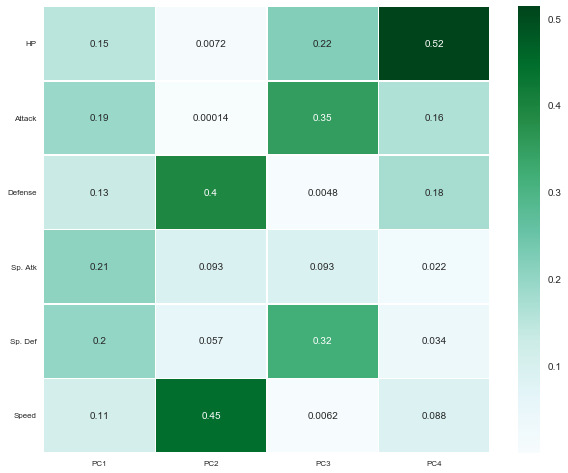

In [24]:
load_sqr = loadings**2
plt.figure(figsize=(10,8))
ax = sns.heatmap(load_sqr.transpose(), linewidths=0.5, cmap="BuGn", annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=8);
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=8);

Since some of the loading factors are negative, I first draw the heatmap of loadings square to see the importance of those abilities for each of the first four principal components. The darker the color, the higher their importance. For example, the loading factors for PC4 show that HP is the most dominant parameter. That is, Pokemon with high HP will have high absolute values of PC4.

Let's look at the actual values of the loading factors now:

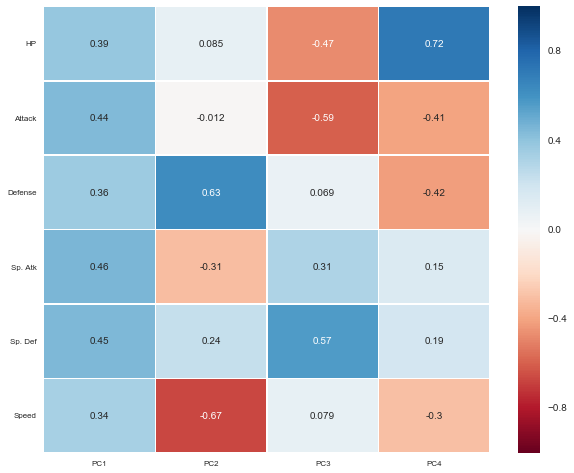

In [25]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=8);
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=8);

Here you can see some more trends. For example, a Pokemon with high Defense or low Speed will have a positive value of PC2. On the other hand, things like Attack or Sp. Defense will control what value a Pokemon will have for PC3.

Another way to look at this is to examine the data with a biplot, which is a scatter plot with vectors indicating what direction a datapoint will take in the PCA given its underlying parameters, and I will color-code the Pokemon by Type to see if there is any obvious trends.

In [29]:
# Create labels based on Type 1
labels = set(ability['Type 1'])
ability['type'] = ability['Type 1']
lab_dict = dict()
for i, elem in enumerate(labels):
    lab_dict[elem] = i
ab = ability.replace({'type' : lab_dict})

pc_types = pcscores.copy()
pc_types['Type'] = ab['Type 1']

# Biplots
def make_plot(pcscores, loadings, xval=0, yval=1, max_arrow=0.2, alpha=0.4):
    n = loadings.shape[1]
    scalex = 1.0 / (pcscores.iloc[:, xval].max() - pcscores.iloc[:, xval].min())  # Rescaling to be from -1 to +1
    scaley = 1.0 / (pcscores.iloc[:, yval].max() - pcscores.iloc[:, yval].min())

    pcscores.iloc[:, xval] = pcscores.iloc[:, xval] * scalex
    pcscores.iloc[:, yval] = pcscores.iloc[:, yval] * scaley

    g = sns.lmplot(x='PC{}'.format(xval + 1), y='PC{}'.format(yval + 1), hue='Type', data=pcscores,
                   fit_reg=False, size=6, palette='muted')

    for i in range(n):
        # Only plot the longer ones
        length = sqrt(loadings.iloc[xval, i] ** 2 + loadings.iloc[yval, i] ** 2)
        if length < max_arrow:
            continue

        plt.arrow(0, 0, loadings.iloc[xval, i], loadings.iloc[yval, i], color='k', alpha=0.9)
        plt.text(loadings.iloc[xval, i] * 1.15, loadings.iloc[yval, i] * 1.15,
                 loadings.columns.tolist()[i], color='k', ha='center', va='center')

    g.set(ylim=(-1, 1))
    g.set(xlim=(-1, 1))

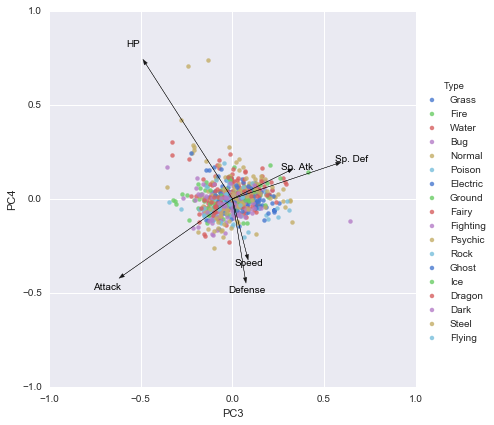

In [30]:
# Actually make a biplot (PC3 vs PC4)
make_plot(pc_types, loadings, 2, 3, max_arrow=0.3)

From the plot above, you can see that Pokemon are primarily centrally distributed, so their stats are fairly balanced. There don't appear to be any obvious trends with type. There are some outliers, for example, 2 normal type Pokemon with high values of PC4. If you recall, PC4's loading factors indicated that HP was the dominant parameter, so the Pokemons with the highest HP will have the highest PC4,

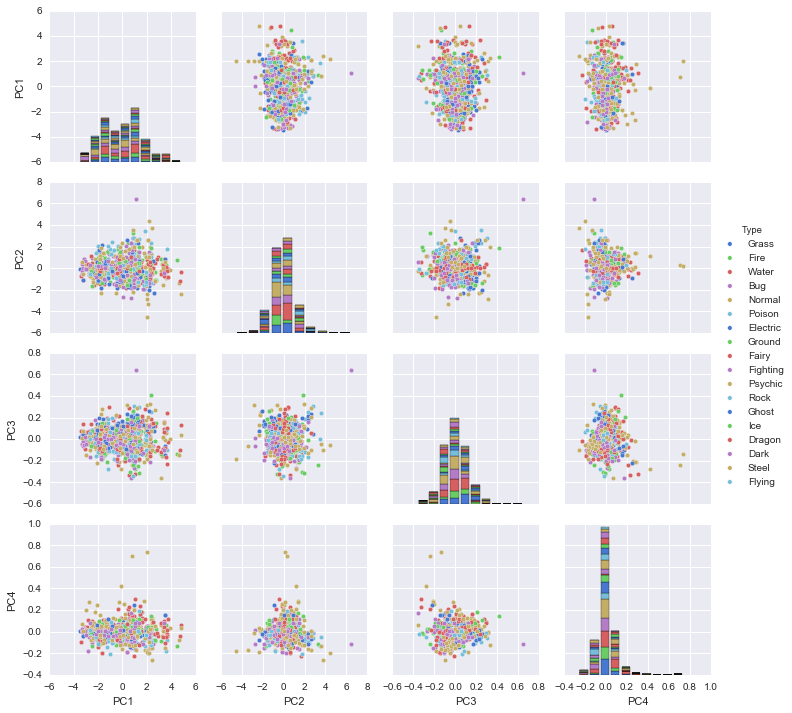

In [31]:
g = sns.pairplot(pc_types, hue='Type', palette='muted')

Again, we can't see a strong trend with Pokemon type. Out of curiosity, what's the Bug-type pokemon with high PC2 and PC3 values?

In [32]:
print(pc_types.sort_values(by='PC2', ascending=False)[:1])
print(pc_types.sort_values(by='PC3', ascending=False)[:1])

          PC1      PC2       PC3       PC4 Type
230  1.076565  6.41447  0.642885 -0.118412  Bug
          PC1      PC2       PC3       PC4 Type
230  1.076565  6.41447  0.642885 -0.118412  Bug


In [34]:
ab.loc[230]

Name       Shuckle
Type 1         Bug
Type 2        Rock
HP              20
Attack          10
Defense        230
Sp. Atk         10
Sp. Def        230
Speed            5
type            12
Name: 230, dtype: object

This is Shuckle, a bug-type Pokemon with very high Defense and Sp. Def at the cost of Attack attributes. Indeed, the PC2-PC3 biplot reveals how it can be used to select high-defense Pokemon. These will be located towards the top right (high PC2 and PC3 values).

# Conclusion

In this project, I first make scatterplots and boxplots to see the basic characteristics in the data set and get a rough understand of the data structure. Then apply principal component analysis to reduce the dimension of the data and do visualization to the principal components. We went from having 6 variables to consider to only having 4. From this, it may be much easier to examine fits or create classification models. That's something I'll look into in the future. 